In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(plt.style.available)
plt.style.use('seaborn-poster')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Cleaning The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [4]:
google_play_df = pd.read_csv("/Users/jordanrjohnson/Downloads/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_play_reviews_df = pd.read_csv("/Users/jordanrjohnson/Downloads/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
# Check out counts of null values in df
google_play_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Check out the unique values in 'Rating' column
google_play_df['Rating'].unique()
# Notice the nan values and 19.0 (a placeholder value)

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
# Find those placeholder values in 'Rating'
google_play_df.loc[google_play_df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# It's just one row, so we will drop it
google_play_df.drop(10472, axis=0, inplace=True)
# Then see if it's gone
google_play_df.loc[google_play_df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [10]:
# Let's see the percentage of nan values
google_play_df['Rating'].isna().sum() / google_play_df.shape[0]

0.13597785977859778

In [11]:
# We will drop them
google_play_df.dropna(axis=0, subset=['Rating'], inplace=True)

In [12]:
# All good! No more nan values in the data we need 
google_play_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [13]:
# Now to get rid of duplicates
# Let's see unique apps vs app count
google_play_df.info()
len(google_play_df['App'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9362 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


8196

In [14]:
# Drop duplicates
google_play_df.drop_duplicates(subset=['App'], inplace=True)
google_play_df.shape

(8196, 13)

**Data Cleaned!**

# For this next section, choose a Category of playstore apps

## Category Chosen: ['Game']



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

**Findings summary**: There are 24 genres represented in the 'Game' category. The 3 genres with the most apps are 'Action' with 292 apps, 'Arcade' with 171 apps, and 'Racing' with 86 apps. See full app count in the code and visuals below. 

If I was making a recommendation to an app manager making a game app, I would say that 'Action', 'Arcade' and 'Racing' apps are the most common genres on the app store. If we want to go with what most people are doing (AKA the trend), we should release an app in one of these genres. However, if we want to be seen as more unique, we should consider releasing the app in the 'Action & Adventure' genre. 
If you're a consumer, you should look for most games in the top 3 categories.

In [15]:
# All Categories
print(google_play_df['Category'].unique())

# New DF with just 'Game' Category
game_category = google_play_df.loc[google_play_df['Category'] == 'GAME']

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [16]:
# Unique Genres in Game Category
game_category['Genres'].unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [17]:
# Number of Unique Genres in Game Category
len(game_category['Genres'].unique())

24

Text(0, 0.5, 'Number of Apps')

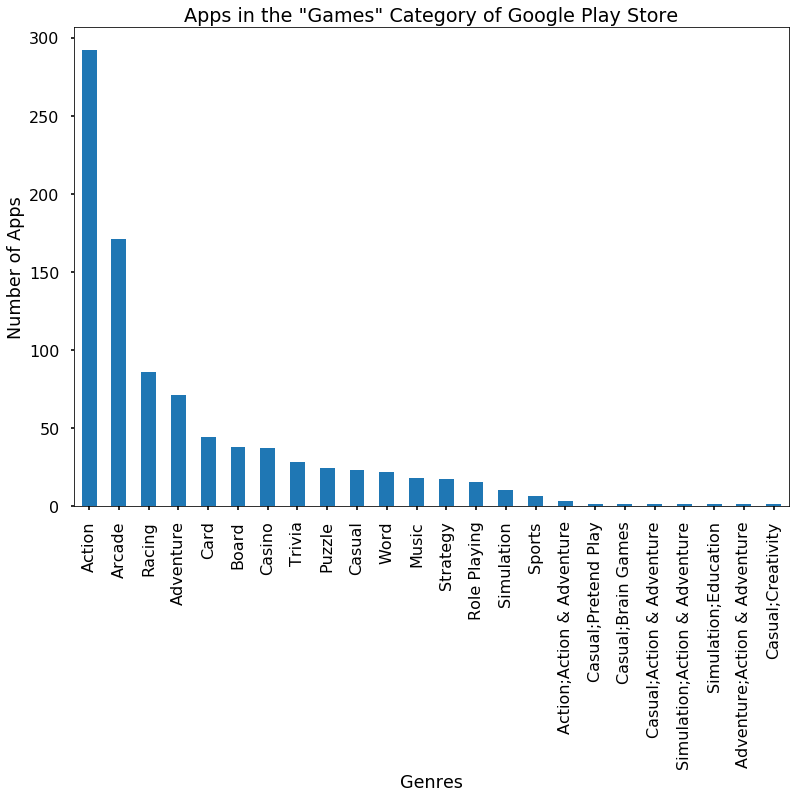

In [18]:
# How many apps in each Genre of Game Category 
apps_per_genre = game_category.groupby('Genres')['App'].count().sort_values(ascending=False)
apps_per_genre.plot(kind='bar')
plt.title('Apps in the "Games" Category of Google Play Store')
plt.ylabel('Number of Apps')

In [22]:
# See the counts, mean, median, and standard deviation
print(apps_per_genre)
print("\n")
print(np.mean(apps_per_genre))
print(np.median(apps_per_genre))
print(np.std(apps_per_genre))

Genres
Action                           292
Arcade                           171
Racing                            86
Adventure                         71
Card                              44
Board                             38
Casino                            37
Trivia                            28
Puzzle                            24
Casual                            23
Word                              22
Music                             18
Strategy                          17
Role Playing                      15
Simulation                        10
Sports                             6
Action;Action & Adventure          3
Casual;Pretend Play                1
Casual;Brain Games                 1
Casual;Action & Adventure          1
Simulation;Action & Adventure      1
Simulation;Education               1
Adventure;Action & Adventure       1
Casual;Creativity                  1
Name: App, dtype: int64


38.0
17.5
64.6780488264759


'hi'